In [1]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("car data.csv")

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
print(df.shape)
print(df.info())

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [14]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [15]:
# print("The Below is the number of occurence of the unique values of the fuel")
print(df['Fuel_Type'].value_counts())

# print("The Below is the number of occurence of the unique values of the Seller_Type")
print(df['Seller_Type'].value_counts())

# print("The Below is the number of occurence of the unique values of the Transformation")
print(df['Transmission'].value_counts())

# print("The Below is the number of occurence of the unique values of the Owner")
print(df['Owner'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [16]:
# Remove the car name feature because it has to nothing to do.
df.drop('Car_Name',axis=1,inplace=True)

# Now we have to find how old the car is as it effect prize of car
df['Current_Year'] = 2020
df['Total_Years'] = df['Current_Year'] - df['Year']

In [17]:
df.drop(['Year','Current_Year'] ,axis=True,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [18]:
df = pd.get_dummies(df,drop_first=True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [20]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Total_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

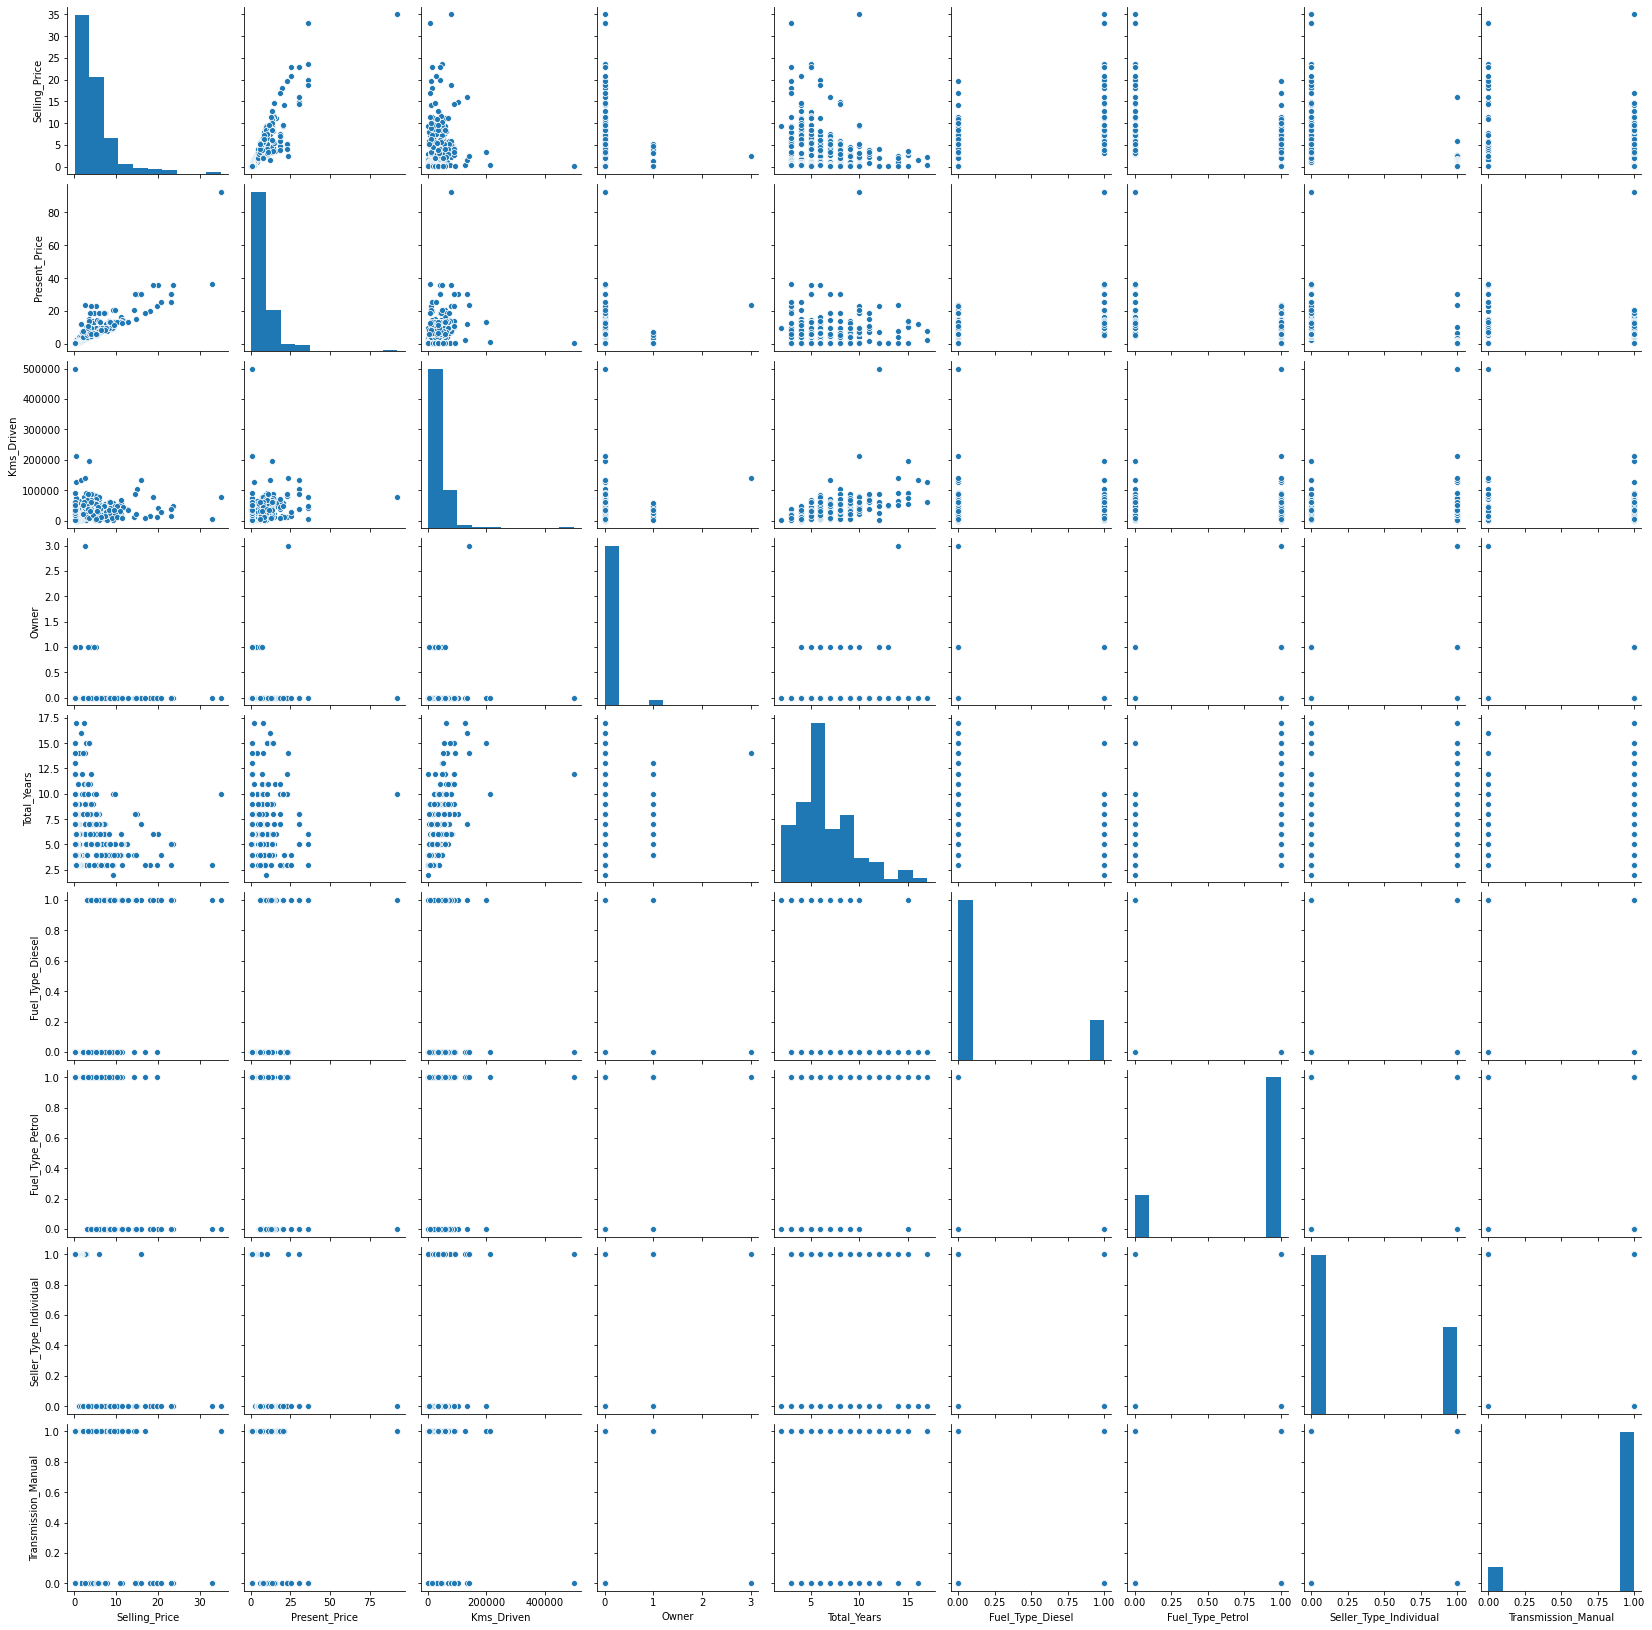

In [13]:
sns.pairplot(df)

<AxesSubplot:>

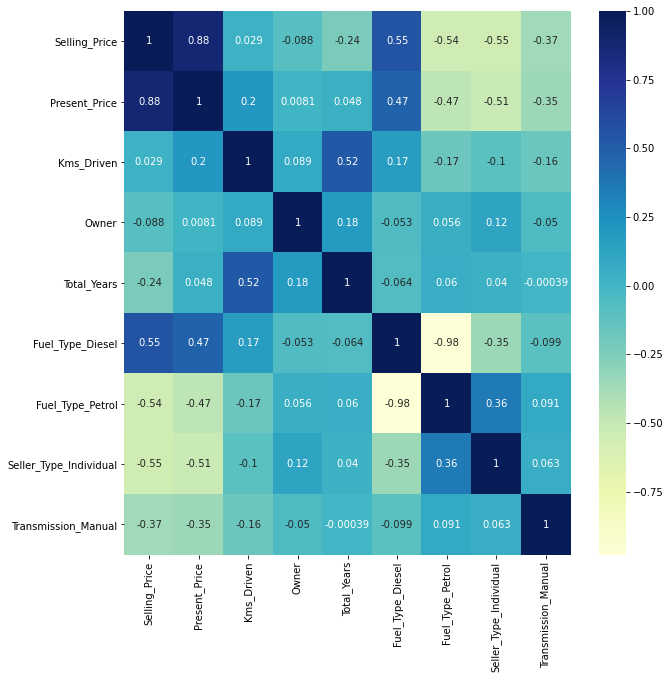

In [14]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, annot=True,center=0,cmap="YlGnBu")

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
# Dependent(y) and Independent(X) Freatures of the data
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
model.feature_importances_

array([0.37056424, 0.04083893, 0.00093427, 0.07787354, 0.22888941,
       0.00831466, 0.13265341, 0.13993155])

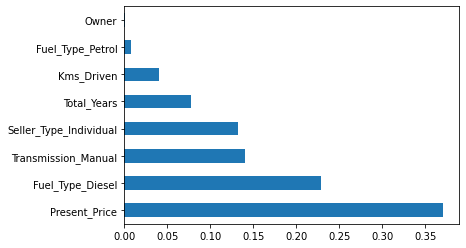

In [19]:
# plot graph for feature importance
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [22]:
# Parameters
# Number of random forest
n_estimators = [int(x) for x in np.linspace(100,1200,num=12)]

# Number of features to consider at the every split
max_features = ['auto','sqrt']

# Maximum Number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Minimum number of samples required to split to a split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]



In [23]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [24]:
# Use ranbom Grid to find the Hyperparameter
# First creat the base model to tune
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [25]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring = 'neg_mean_squared_error', n_iter = 10,cv = 5,verbose = 2,random_state = 42,n_jobs = 1)

In [26]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [27]:
predictions = rf_random.predict(X_test)

In [28]:
predictions

array([ 7.2354 ,  0.53581,  5.01919,  9.26379, 16.64256,  5.04751,
        3.39906,  0.77896,  4.59085,  4.50945,  3.12165,  0.88121,
        5.02189,  7.67873,  7.95189, 10.22377,  7.13902,  4.0806 ,
        0.49608,  1.4726 ,  3.9598 ,  4.56669,  5.49682,  9.50434,
        0.24555,  0.76131,  0.55102,  0.63813,  0.49565,  4.92885,
        5.19685,  5.81055,  0.51984,  8.92353,  3.50445,  1.15996,
        5.59019,  7.43779,  0.25112,  9.17414,  9.41809, 19.6037 ,
        4.93864,  4.06045,  5.42475, 11.89396,  0.32476,  0.87844,
        4.9988 ,  8.30409,  7.33841,  3.52087,  4.76675, 20.70888,
        1.08359,  1.05963,  0.49027,  2.7441 ,  3.7171 ,  1.27137,
        3.93186,  8.62458,  3.21682, 21.1566 ,  4.16845,  5.50784,
       10.13734,  4.91235,  0.56598,  3.00837,  3.48103,  3.0384 ,
        0.62344,  5.4795 ,  0.95122,  2.85608,  0.50687,  9.08621,
        1.27232,  2.7507 ,  0.50057, 10.15662,  7.49232,  5.37902,
        5.1311 ,  0.92515,  6.23175,  5.98746,  0.45072,  5.02

<AxesSubplot:xlabel='Selling_Price'>

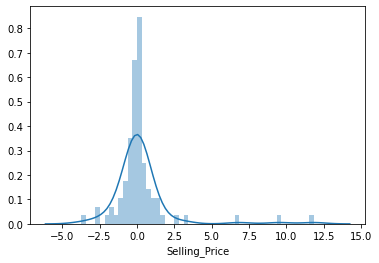

In [29]:
sns.distplot(y_test-predictions)

In [30]:
rf_random.predict(X_test)

array([ 7.2354 ,  0.53581,  5.01919,  9.26379, 16.64256,  5.04751,
        3.39906,  0.77896,  4.59085,  4.50945,  3.12165,  0.88121,
        5.02189,  7.67873,  7.95189, 10.22377,  7.13902,  4.0806 ,
        0.49608,  1.4726 ,  3.9598 ,  4.56669,  5.49682,  9.50434,
        0.24555,  0.76131,  0.55102,  0.63813,  0.49565,  4.92885,
        5.19685,  5.81055,  0.51984,  8.92353,  3.50445,  1.15996,
        5.59019,  7.43779,  0.25112,  9.17414,  9.41809, 19.6037 ,
        4.93864,  4.06045,  5.42475, 11.89396,  0.32476,  0.87844,
        4.9988 ,  8.30409,  7.33841,  3.52087,  4.76675, 20.70888,
        1.08359,  1.05963,  0.49027,  2.7441 ,  3.7171 ,  1.27137,
        3.93186,  8.62458,  3.21682, 21.1566 ,  4.16845,  5.50784,
       10.13734,  4.91235,  0.56598,  3.00837,  3.48103,  3.0384 ,
        0.62344,  5.4795 ,  0.95122,  2.85608,  0.50687,  9.08621,
        1.27232,  2.7507 ,  0.50057, 10.15662,  7.49232,  5.37902,
        5.1311 ,  0.92515,  6.23175,  5.98746,  0.45072,  5.02

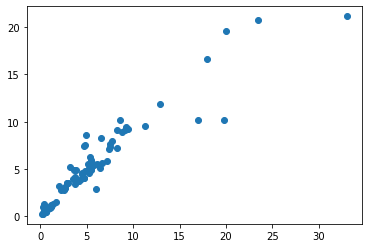

In [31]:
plt.scatter(y_test,predictions)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8884964835164851
MSE: 3.9432420333560465
RMSE: 1.9857598126047487


In [33]:
import pickle
# open a file where you ant to store the data
file = open("random_forest_regression_car_model.pkl","wb")

# Dump information 
pickle.dump(rf_random,file)

In [34]:
# 5.59	27000	0	6	0	1	0	1
rf_random.predict([[5.59,27000,0,6,0,1,0,1]])

array([3.6971])